In [ ]:
# REFERENCIA RÁPIDA: Colores y Mapas de Color en Matplotlib
# https://matplotlib.org/stable/users/explain/colors/index.html
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
# https://matplotlib.org/stable/_images/sphx_glr_colors_004.png
'''
=============================================================================
ESPECIFICACIÓN DE COLORES
=============================================================================

Matplotlib acepta múltiples formatos para definir colores:

1. Nombres de colores CSS:
    'red', 'blue', 'green', 'yellow', 'black', 'white', etc.
    color='red'

2. Abreviaturas de un solo carácter:
    'r' (red), 'g' (green), 'b' (blue), 'c' (cyan), 
    'm' (magenta), 'y' (yellow), 'k' (black), 'w' (white)
    color='r'

3. Códigos hexadecimales:
    '#RRGGBB' formato hexadecimal
    color='#FF5733'

4. Tuplas RGB/RGBA:
    (R, G, B) valores entre 0 y 1
    (R, G, B, A) con A = transparencia (alpha)
    color=(0.2, 0.4, 0.6)
    color=(0.2, 0.4, 0.6, 0.8)

5. Escala de grises:
    Strings numéricos entre '0' (negro) y '1' (blanco)
    color='0.75'

=============================================================================
PARÁMETROS DE COLOR EN GRÁFICOS
=============================================================================

ax.plot():
    color='blue'             # Color de la línea
    markerfacecolor='red'    # Color de relleno del marcador
    markeredgecolor='black'  # Color del borde del marcador

ax.bar():
    color='blue'             # Color de las barras
    edgecolor='black'        # Color del borde de las barras
    alpha=0.7                # Transparencia (0=transparente, 1=opaco)

ax.scatter():
    c=values                 # Color(es) - puede ser array para colormap
    cmap='viridis'           # Mapa de color a usar
    s=sizes                  # Tamaños de puntos
    alpha=0.8                # Transparencia

=============================================================================
COLORMAPS (MAPAS DE COLOR)
=============================================================================

Los colormaps mapean valores numéricos a colores. Útiles para visualizar
datos continuos o categóricos.

Categorías principales:

1. Sequential (secuenciales) - para datos ordenados de bajo a alto:
    'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    'Blues', 'Greens', 'Reds', 'YlOrRd', 'PuBu'

2. Diverging (divergentes) - para datos con punto central significativo:
    'RdYlBu', 'RdYlGn', 'RdBu', 'PiYG', 'coolwarm', 'seismic'

3. Cyclic (cíclicos) - para datos que "envuelven" (ej: ángulos):
    'hsv', 'twilight', 'twilight_shifted'

4. Qualitative (cualitativos) - para datos categóricos:
    'tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Paired'

Uso:
    ax.imshow(data, cmap='viridis')
    ax.scatter(x, y, c=values, cmap='coolwarm')

Invertir colormap (agregar '_r'):
    cmap='viridis_r'

=============================================================================
VISUALIZACIÓN DE IMÁGENES Y MATRICES (ax.imshow)
=============================================================================

ax.imshow() muestra matrices 2D como imágenes:

    ax.imshow(
        data,                    # Matriz 2D de valores
        cmap='viridis',          # Mapa de color
        interpolation='nearest', # Método de interpolación
        extent=(x0,x1,y0,y1),   # Límites de coordenadas (opcional)
        aspect='auto',           # Relación de aspecto
        alpha=0.8,               # Transparencia
        vmin=0, vmax=10          # Rango de valores para colormap
    )

Métodos de interpolación comunes:
    'nearest'   → Sin suavizado (valores exactos)
    'bilinear'  → Interpolación lineal en 2D
    'bicubic'   → Interpolación cúbica (más suave)
    'gaussian'  → Suavizado gaussiano
    'spline16'  → Interpolación con splines

extent: Define las coordenadas de las esquinas de la imagen
    extent=(left, right, bottom, top)
    Útil para alinear la imagen con un sistema de coordenadas específico

=============================================================================
GRÁFICOS POLARES
=============================================================================

Los gráficos polares usan coordenadas (ángulo, radio):

    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    
    ax.scatter(theta, r, ...)  # theta = ángulo en radianes
    ax.plot(theta, r, ...)

Parámetros específicos:
    theta: Ángulo en radianes (0 a 2π)
    r: Radio (distancia desde el origen)

Casos de uso:
    - Datos direccionales (viento, orientación)
    - Patrones cíclicos (horarios, estaciones)
    - Análisis de frecuencias
    - Diagramas de radiación

=============================================================================
COLORBAR (BARRA DE COLOR)
=============================================================================

Agregar barra de color para interpretar colormaps:

    plt.colorbar(
        mappable=scatter_obj,    # Objeto con colormap (scatter, imshow, etc.)
        ax=ax,                   # Eje al que asociar (opcional)
        location='right',        # 'left', 'right', 'top', 'bottom'
        label='Valores',         # Etiqueta de la barra
        shrink=0.8,              # Factor de escala (0-1)
        pad=0.05                 # Separación del gráfico
    )

Nota: Se puede usar plt.colorbar() o fig.colorbar()

=============================================================================
ZORDER (ORDEN DE APILAMIENTO)
=============================================================================

zorder controla qué elementos se dibujan encima de otros:

    ax.plot(x, y, zorder=1)      # Se dibuja primero (atrás)
    ax.plot(x, z, zorder=2)      # Se dibuja después (adelante)

Valores típicos:
    - Cuadrícula: zorder=0 (fondo)
    - Líneas/datos: zorder=1-3 (medio)
    - Anotaciones: zorder=4+ (frente)

Mayor zorder = más al frente

=============================================================================
CASOS DE USO COMUNES
=============================================================================

1. Gráfico de líneas con colores personalizados:
    ax.plot(x, y1, color='#e74c3c', linewidth=2)
    ax.plot(x, y2, color='#3498db', linewidth=2)

2. Barras con bordes destacados:
    ax.bar(x, heights, color='skyblue', edgecolor='navy', linewidth=2)

3. Scatter con colormap según valores:
    sc = ax.scatter(x, y, c=values, cmap='viridis', s=50)
    plt.colorbar(mappable=sc, label='Valores')

4. Mapa de calor con imshow:
    im = ax.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(mappable=im, label='Temperatura')

5. Gráfico polar con colores cíclicos:
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    sc = ax.scatter(angles, radii, c=angles, cmap='hsv')
    plt.colorbar(mappable=sc)

'''

'\n=============================================================================\nESPECIFICACIÓN DE COLORES\n=============================================================================\n\nMatplotlib acepta múltiples formatos para definir colores:\n\n1. Nombres de colores CSS:\n    \'red\', \'blue\', \'green\', \'yellow\', \'black\', \'white\', etc.\n    color=\'red\'\n\n2. Abreviaturas de un solo carácter:\n    \'r\' (red), \'g\' (green), \'b\' (blue), \'c\' (cyan), \n    \'m\' (magenta), \'y\' (yellow), \'k\' (black), \'w\' (white)\n    color=\'r\'\n\n3. Códigos hexadecimales:\n    \'#RRGGBB\' formato hexadecimal\n    color=\'#FF5733\'\n\n4. Tuplas RGB/RGBA:\n    (R, G, B) valores entre 0 y 1\n    (R, G, B, A) con A = transparencia (alpha)\n    color=(0.2, 0.4, 0.6)\n    color=(0.2, 0.4, 0.6, 0.8)\n\n5. Escala de grises:\n    Strings numéricos entre \'0\' (negro) y \'1\' (blanco)\n    color=\'0.75\'\n\n=============================================================================\nPA

In [3]:
# Celda 1: Configuración
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [4]:
layout = 'constrained'
figsize = (10,6)
X = [1,2,3,4,5,6,7,8]
Y = [3,4,5,3,2,4,5,7]
Z = [1,3,2,5,5,7,4,6]

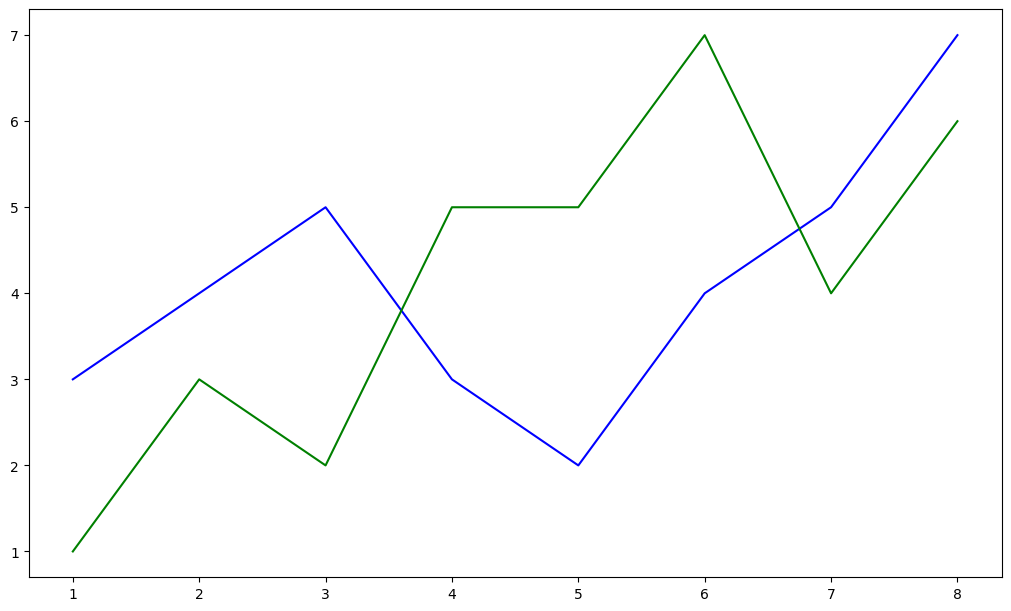

In [5]:
fig, ax = plt.subplots(figsize=figsize, layout=layout)

ax.plot(X, Y, color='b', zorder=1)
ax.plot(X, Z, color='g', zorder=2)

plt.show()

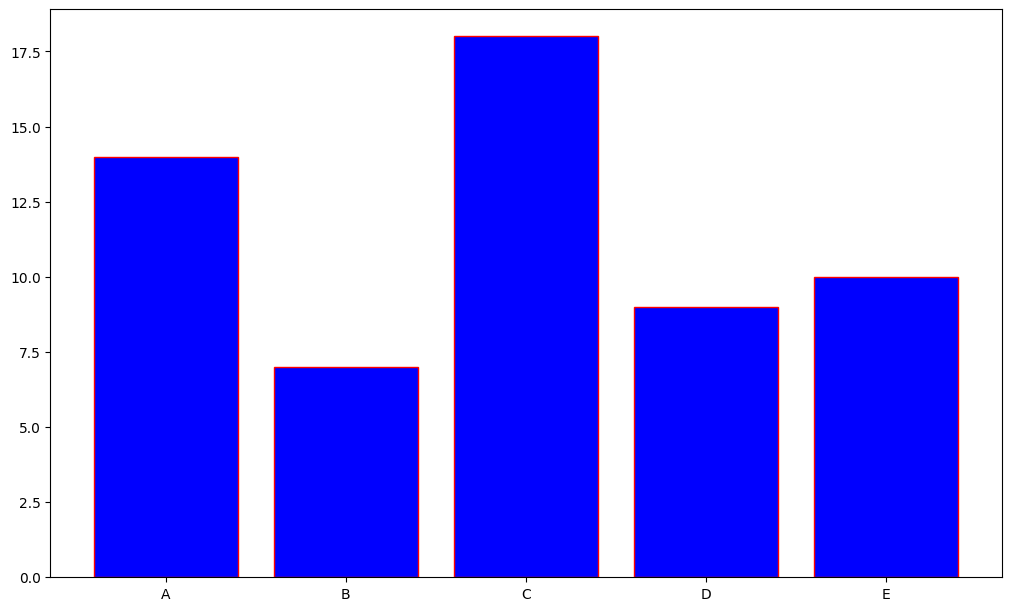

In [6]:
X = ['A', 'B', 'C', 'D', 'E']
Y = [14, 7 ,18, 9, 10]

fig, ax = plt.subplots(figsize=figsize, layout=layout)
ax.bar(X, Y, color='b', edgecolor='r')

plt.show()

In [7]:
# https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py
arr1 = np.arange(3, 9)
X = []
for i in range(6):
    X.append(arr1)
X = np.array(X)

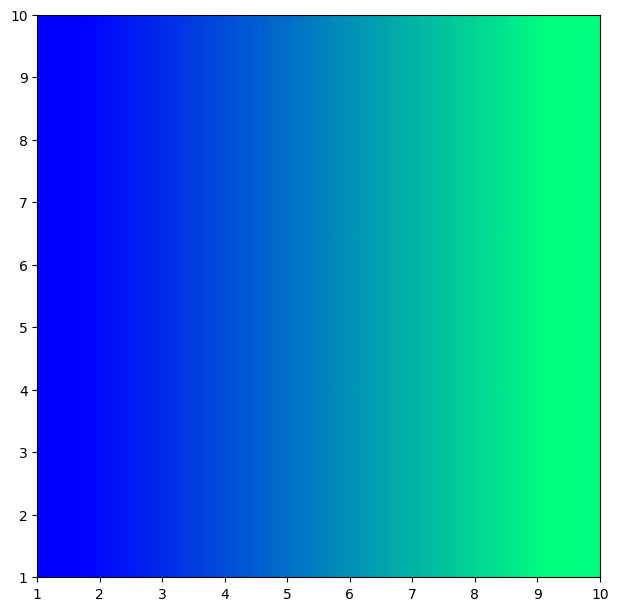

In [8]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow
fig, ax = plt.subplots(figsize=figsize, layout=layout)

ax.imshow(X, cmap='winter', interpolation='bilinear', extent=(1,10,1,10))
plt.show()

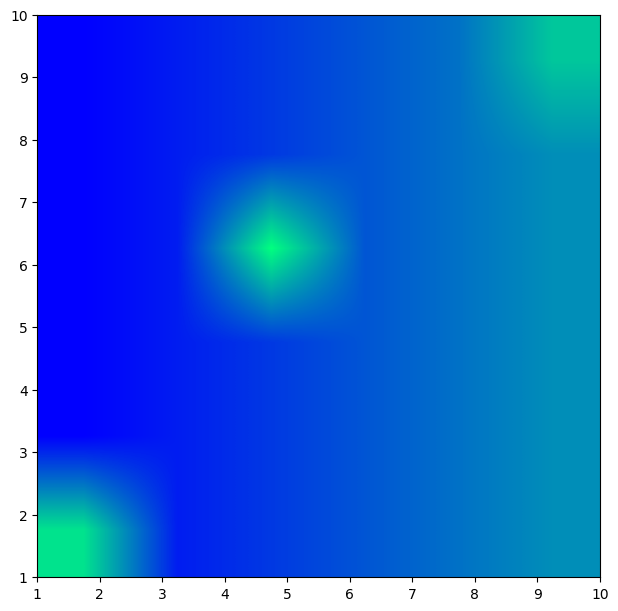

In [9]:
X = np.array([
    [2,3,4,5,6,9],
    [2,3,4,5,6,7],
    [2,3,11,5,6,7],
    [2,3,4,5,6,7],
    [2,3,4,5,6,7],
    [10,3,4,5,6,7]
])

fig, ax = plt.subplots(figsize=figsize, layout=layout)
# Variar los valores de la matriz y observar
# Variar los parámetros, interpolation, extent, cmap
ax.imshow(X, cmap='winter', interpolation='bilinear', extent=(1,10,1,10))
plt.show()

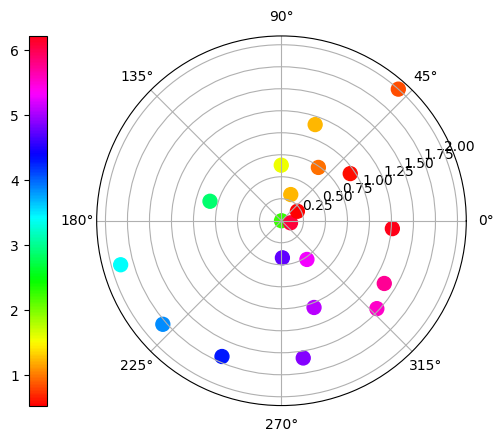

In [10]:
r = np.linspace(0, 2, 20)
beta = np.pi*r
beta = np.pi*2*np.random.rand(20)
colors = beta

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
sc = ax.scatter(beta, r, c=colors, s=100, cmap='hsv')

plt.colorbar(mappable=sc, location='left') # plt o fig es igual

plt.show()

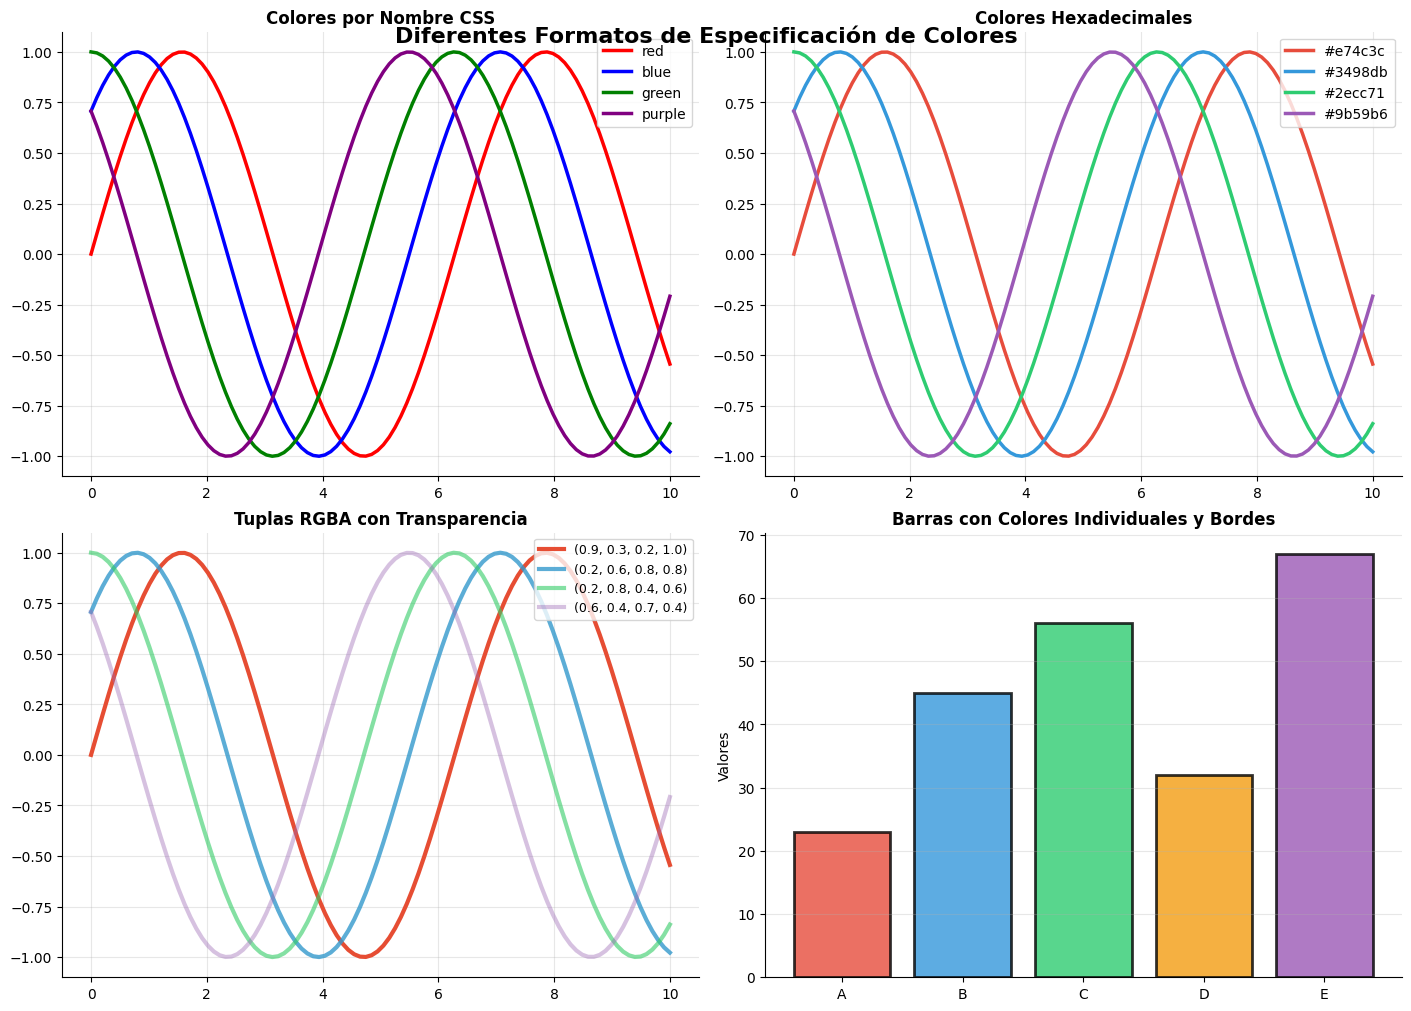

In [11]:
# Celda: COMPARACIÓN DE FORMATOS DE COLOR en Múltiples Subplots
# Demuestra diferentes formas de especificar colores

# Datos de ejemplo
X = np.linspace(0, 10, 100)
Y1 = np.sin(X)
Y2 = np.sin(X + np.pi/4)
Y3 = np.sin(X + np.pi/2)
Y4 = np.sin(X + 3*np.pi/4)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), layout='constrained')

# Superior izquierdo: Nombres de colores CSS
axs[0, 0].plot(X, Y1, color='red', linewidth=2.5, label='red')
axs[0, 0].plot(X, Y2, color='blue', linewidth=2.5, label='blue')
axs[0, 0].plot(X, Y3, color='green', linewidth=2.5, label='green')
axs[0, 0].plot(X, Y4, color='purple', linewidth=2.5, label='purple')
axs[0, 0].set_title('Colores por Nombre CSS', fontsize=12, fontweight='bold')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# Superior derecho: Códigos hexadecimales
axs[0, 1].plot(X, Y1, color='#e74c3c', linewidth=2.5, label='#e74c3c')
axs[0, 1].plot(X, Y2, color='#3498db', linewidth=2.5, label='#3498db')
axs[0, 1].plot(X, Y3, color='#2ecc71', linewidth=2.5, label='#2ecc71')
axs[0, 1].plot(X, Y4, color='#9b59b6', linewidth=2.5, label='#9b59b6')
axs[0, 1].set_title('Colores Hexadecimales', fontsize=12, fontweight='bold')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)

# Inferior izquierdo: Tuplas RGBA con transparencia
axs[1, 0].plot(X, Y1, color=(0.9, 0.3, 0.2, 1.0), linewidth=3, label='(0.9, 0.3, 0.2, 1.0)')
axs[1, 0].plot(X, Y2, color=(0.2, 0.6, 0.8, 0.8), linewidth=3, label='(0.2, 0.6, 0.8, 0.8)')
axs[1, 0].plot(X, Y3, color=(0.2, 0.8, 0.4, 0.6), linewidth=3, label='(0.2, 0.8, 0.4, 0.6)')
axs[1, 0].plot(X, Y4, color=(0.6, 0.4, 0.7, 0.4), linewidth=3, label='(0.6, 0.4, 0.7, 0.4)')
axs[1, 0].set_title('Tuplas RGBA con Transparencia', fontsize=12, fontweight='bold')
axs[1, 0].legend(loc='upper right', fontsize=9)
axs[1, 0].grid(True, alpha=0.3)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# Inferior derecho: Barras con color y edgecolor
categorias = ['A', 'B', 'C', 'D', 'E']
valores = [23, 45, 56, 32, 67]
colores_barras = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
axs[1, 1].bar(categorias, valores, color=colores_barras, edgecolor='black', linewidth=2, alpha=0.8)
axs[1, 1].set_title('Barras con Colores Individuales y Bordes', fontsize=12, fontweight='bold')
axs[1, 1].set_ylabel('Valores', fontsize=10)
axs[1, 1].grid(True, alpha=0.3, axis='y')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)

# Título general
fig.suptitle('Diferentes Formatos de Especificación de Colores', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

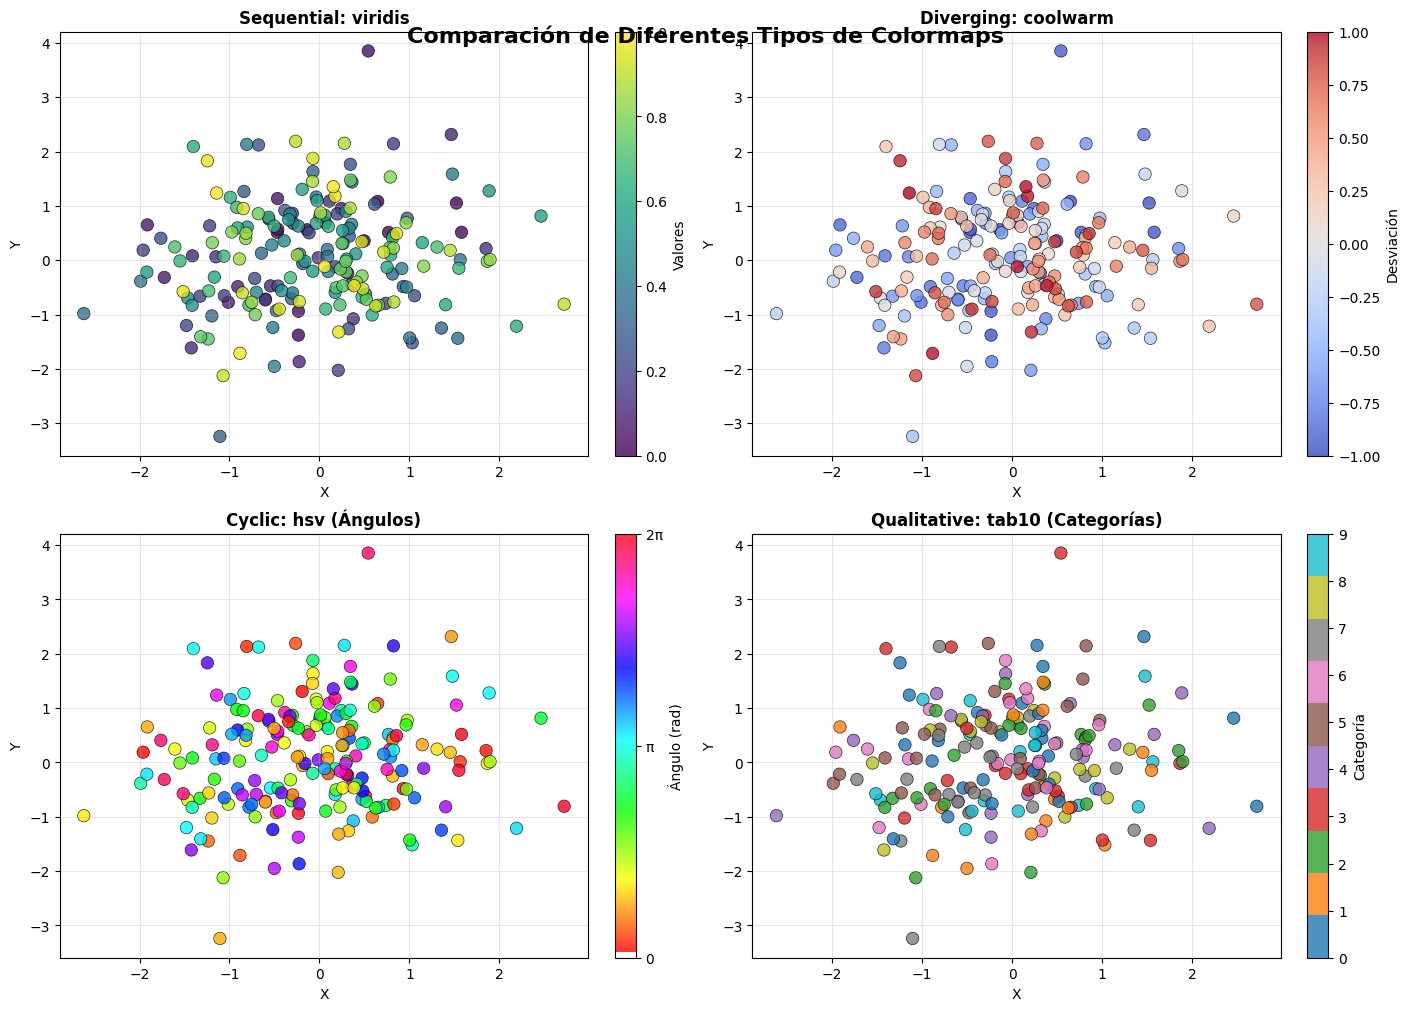

In [12]:
# Celda: COMPARACIÓN DE COLORMAPS con Scatter Plots
# Demuestra diferentes categorías de colormaps

# Generar datos de ejemplo
np.random.seed(42)
n_points = 200
x = np.random.randn(n_points)
y = np.random.randn(n_points)
values = np.linspace(0, 1, n_points)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), layout='constrained')

# Sequential: viridis
sc1 = axs[0, 0].scatter(x, y, c=values, s=80, cmap='viridis', alpha=0.8, edgecolors='black', linewidths=0.5)
axs[0, 0].set_title('Sequential: viridis', fontsize=12, fontweight='bold')
plt.colorbar(mappable=sc1, ax=axs[0, 0], label='Valores')
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Diverging: coolwarm
# Recentrar valores alrededor de 0 para mostrar divergencia
values_div = (values - 0.5) * 2
sc2 = axs[0, 1].scatter(x, y, c=values_div, s=80, cmap='coolwarm', alpha=0.8, edgecolors='black', linewidths=0.5)
axs[0, 1].set_title('Diverging: coolwarm', fontsize=12, fontweight='bold')
plt.colorbar(mappable=sc2, ax=axs[0, 1], label='Desviación')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')

# Cyclic: hsv (para datos angulares)
angles = np.random.uniform(0, 2*np.pi, n_points)
sc3 = axs[1, 0].scatter(x, y, c=angles, s=80, cmap='hsv', alpha=0.8, edgecolors='black', linewidths=0.5)
axs[1, 0].set_title('Cyclic: hsv (Ángulos)', fontsize=12, fontweight='bold')
cbar3 = plt.colorbar(mappable=sc3, ax=axs[1, 0], label='Ángulo (rad)')
cbar3.set_ticks([0, np.pi, 2*np.pi])
cbar3.set_ticklabels(['0', 'π', '2π'])
axs[1, 0].grid(True, alpha=0.3)
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')

# Qualitative: tab10 (categorías discretas)
categories = np.random.randint(0, 10, n_points)
sc4 = axs[1, 1].scatter(x, y, c=categories, s=80, cmap='tab10', alpha=0.8, edgecolors='black', linewidths=0.5)
axs[1, 1].set_title('Qualitative: tab10 (Categorías)', fontsize=12, fontweight='bold')
plt.colorbar(mappable=sc4, ax=axs[1, 1], label='Categoría', ticks=range(10))
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')

# Título general
fig.suptitle('Comparación de Diferentes Tipos de Colormaps', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

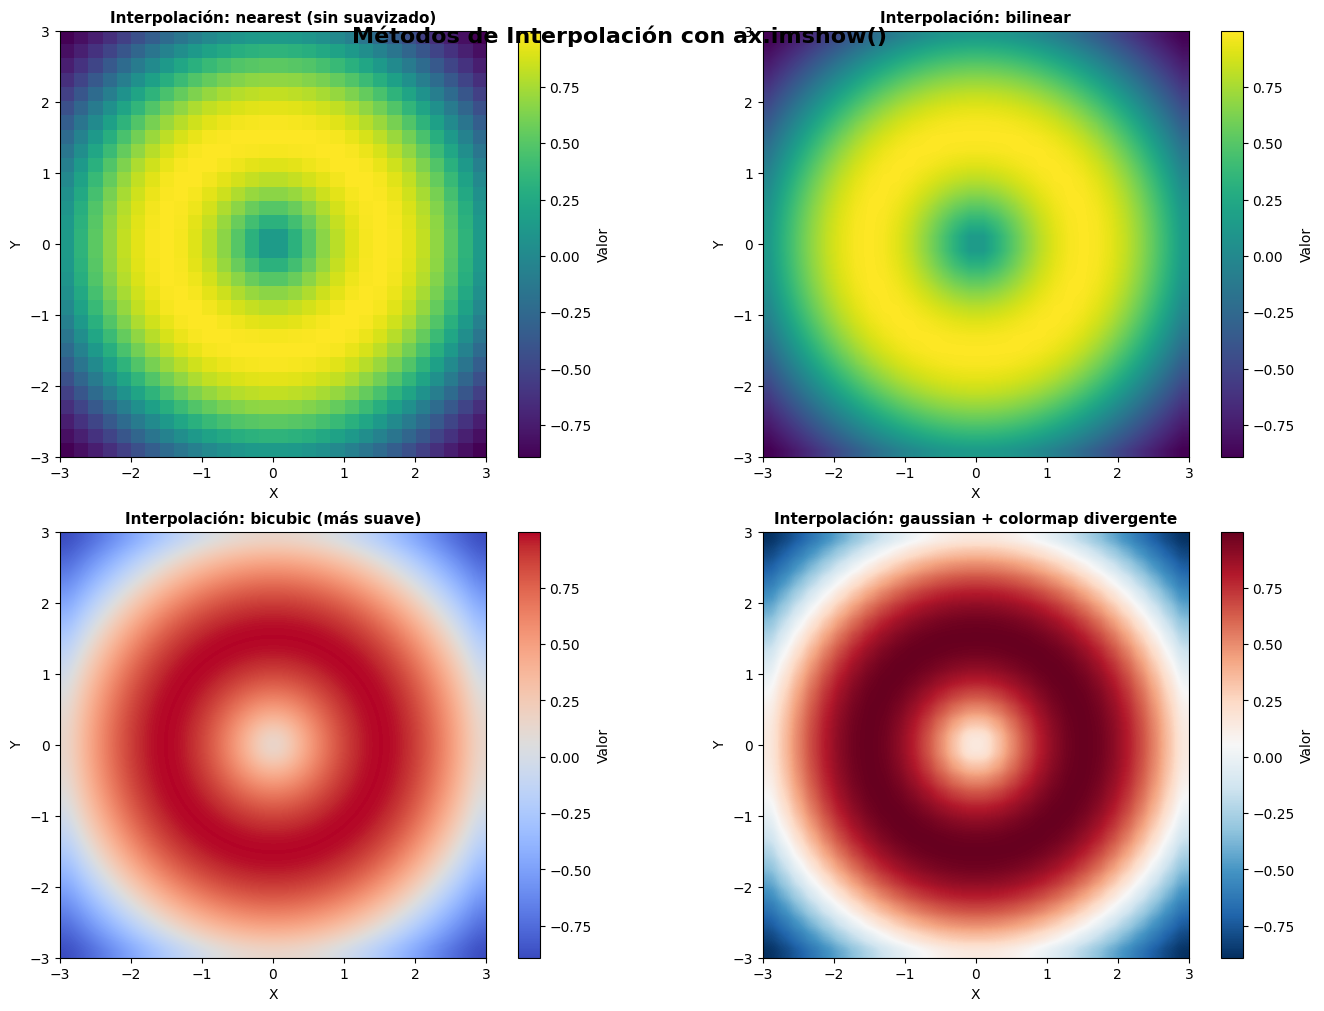

In [15]:
# Celda: VISUALIZACIÓN DE MATRICES CON IMSHOW
# Demuestra interpolaciones y extent

# Crear matriz de ejemplo con patrón interesante
X_grid, Y_grid = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
Z = np.sin(np.sqrt(X_grid**2 + Y_grid**2))

fig, axs = plt.subplots(2, 2, figsize=(14, 10), layout='constrained')

# Interpolación: nearest
im1 = axs[0, 0].imshow(Z, cmap='viridis', interpolation='nearest', extent=(-3, 3, -3, 3))
axs[0, 0].set_title('Interpolación: nearest (sin suavizado)', fontsize=11, fontweight='bold')
plt.colorbar(mappable=im1, ax=axs[0, 0], label='Valor')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Interpolación: bilinear
im2 = axs[0, 1].imshow(Z, cmap='viridis', interpolation='bilinear', extent=(-3, 3, -3, 3))
axs[0, 1].set_title('Interpolación: bilinear', fontsize=11, fontweight='bold')
plt.colorbar(mappable=im2, ax=axs[0, 1], label='Valor')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')

# Interpolación: bicubic
im3 = axs[1, 0].imshow(Z, cmap='coolwarm', interpolation='bicubic', extent=(-3, 3, -3, 3))
axs[1, 0].set_title('Interpolación: bicubic (más suave)', fontsize=11, fontweight='bold')
plt.colorbar(mappable=im3, ax=axs[1, 0], label='Valor')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')

# Interpolación: gaussian con colormap divergente
im4 = axs[1, 1].imshow(Z, cmap='RdBu_r', interpolation='gaussian', extent=(-3, 3, -3, 3))
axs[1, 1].set_title('Interpolación: gaussian + colormap divergente', fontsize=11, fontweight='bold')
plt.colorbar(mappable=im4, ax=axs[1, 1], label='Valor')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')

# Título general
fig.suptitle('Métodos de Interpolación con ax.imshow()', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

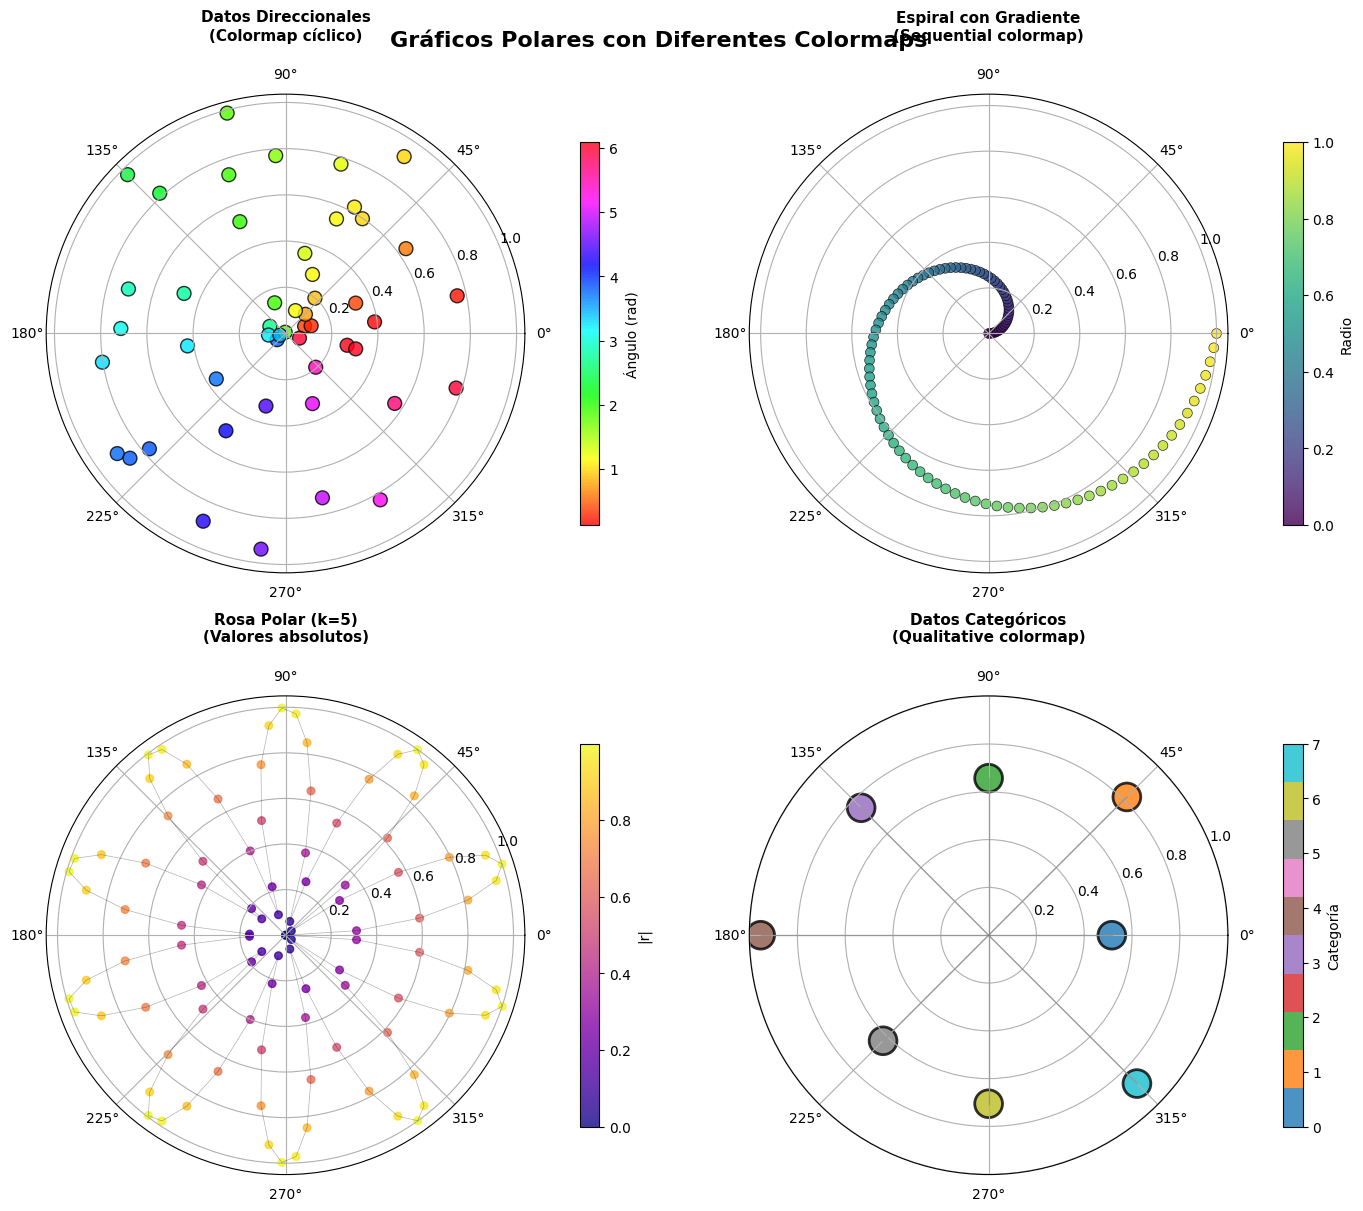

In [14]:
# Celda: GRÁFICOS POLARES CON COLORMAPS
# Demuestra uso de proyección polar con colores cíclicos

# Datos para múltiples series polares
n_points = 100
theta = np.linspace(0, 2*np.pi, n_points)

# Crear figura con 2x2 subplots polares
fig, axs = plt.subplots(2, 2, figsize=(14, 12), 
                        subplot_kw=dict(projection='polar'),
                        layout='constrained')

# Rosa de los vientos (scatter con colormap hsv)
np.random.seed(42)
theta_scatter = 2*np.pi*np.random.rand(50)
r_scatter = np.random.rand(50)
colors_scatter = theta_scatter
sc1 = axs[0, 0].scatter(theta_scatter, r_scatter, c=colors_scatter, s=100, 
                        cmap='hsv', alpha=0.8, edgecolors='black', linewidths=1)
axs[0, 0].set_title('Datos Direccionales\n(Colormap cíclico)', fontsize=11, fontweight='bold', pad=20)
plt.colorbar(mappable=sc1, ax=axs[0, 0], label='Ángulo (rad)', shrink=0.8)

# Espiral con gradiente de color
r_spiral = np.linspace(0, 1, n_points)
sc2 = axs[0, 1].scatter(theta, r_spiral, c=r_spiral, s=50, 
                        cmap='viridis', alpha=0.8, edgecolors='black', linewidths=0.5)
axs[0, 1].set_title('Espiral con Gradiente\n(Sequential colormap)', fontsize=11, fontweight='bold', pad=20)
plt.colorbar(mappable=sc2, ax=axs[0, 1], label='Radio', shrink=0.8)

# Función polar (pétalos de rosa)
k = 5
r_rose = np.sin(k * theta)
colors_rose = np.abs(r_rose)
sc3 = axs[1, 0].scatter(theta, np.abs(r_rose), c=colors_rose, s=30, 
                        cmap='plasma', alpha=0.8)
axs[1, 0].plot(theta, np.abs(r_rose), color='black', linewidth=0.5, alpha=0.3)
axs[1, 0].set_title(f'Rosa Polar (k={k})\n(Valores absolutos)', fontsize=11, fontweight='bold', pad=20)
plt.colorbar(mappable=sc3, ax=axs[1, 0], label='|r|', shrink=0.8)

# Sectores con diferentes colores (datos categóricos)
theta_sectors = np.linspace(0, 2*np.pi, 8, endpoint=False)
r_sectors = np.random.uniform(0.5, 1.0, 8)
categories_polar = np.arange(8)
sc4 = axs[1, 1].scatter(theta_sectors, r_sectors, c=categories_polar, s=400, 
                        cmap='tab10', alpha=0.8, edgecolors='black', linewidths=2)
# Agregar líneas desde el origen
for t, r in zip(theta_sectors, r_sectors):
    axs[1, 1].plot([0, t], [0, r], color='gray', linewidth=1, alpha=0.5)
axs[1, 1].set_title('Datos Categóricos\n(Qualitative colormap)', fontsize=11, fontweight='bold', pad=20)
plt.colorbar(mappable=sc4, ax=axs[1, 1], label='Categoría', ticks=range(8), shrink=0.8)

# Título general
fig.suptitle('Gráficos Polares con Diferentes Colormaps', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()